In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pop = pd.read_csv("pop_genres_dataset.csv")
pop.head()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,my little airport,每次你走的時分,47,183968,0,0.576,0.505,11,-13.070,0,0.0392,0.753,0.199000,0.151,0.570,127.025,4,cantopop
1,my little airport,下了兩天雨,44,172343,0,0.577,0.228,11,-14.684,1,0.0306,0.834,0.000805,0.384,0.161,119.035,4,cantopop
2,my little airport,詩歌舞街,50,191308,0,0.641,0.479,4,-15.395,1,0.0443,0.732,0.059800,0.115,0.301,121.974,4,cantopop
3,my little airport,那陣時不知道,48,148564,0,0.613,0.210,5,-15.309,1,0.0309,0.769,0.000477,0.139,0.268,132.035,4,cantopop
4,Eason Chan,無條件,54,228973,0,0.646,0.370,0,-10.980,1,0.0351,0.825,0.000005,0.090,0.465,129.914,4,cantopop


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Predicting Genre with Random Forest

In [6]:
# Only selecting numeric variables
predictors = ['energy', 'acousticness', 'valence', 'loudness', 'danceability']
target = 'track_genre'

X = pop[predictors]
y = pop[target]

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

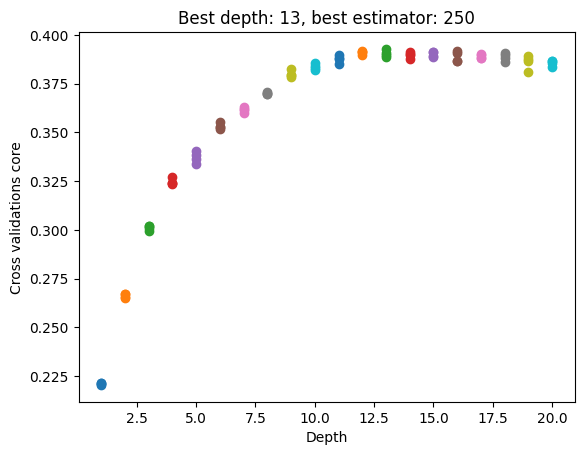

In [7]:
# Getting the best number of estimators and depth
estimators = np.arange(100, 300, 50)
depths = np.arange(1, 21)
best_score = 0
best_depth = 0
best_estimator = 0

fig,ax = plt.subplots(1)
ax.set(xlabel = "Depth", ylabel = "Cross validations core")

for e in estimators:
    for d in depths:
        rf = RandomForestClassifier(n_estimators= 100, max_depth = d)

        # Cross validate with 5 folds
        score = cross_val_score(rf, X_train, y_train, cv = 5, scoring="accuracy").mean()

        if score >= best_score:
            best_score = score
            best_depth = d
            best_estimator = e
        
        ax.scatter(d, score)

ax.set(title = f"Best depth: {best_depth}, best estimator: {best_estimator}")
plt.show()

In [8]:
rf = RandomForestClassifier(n_estimators= best_estimator, max_depth = best_depth)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

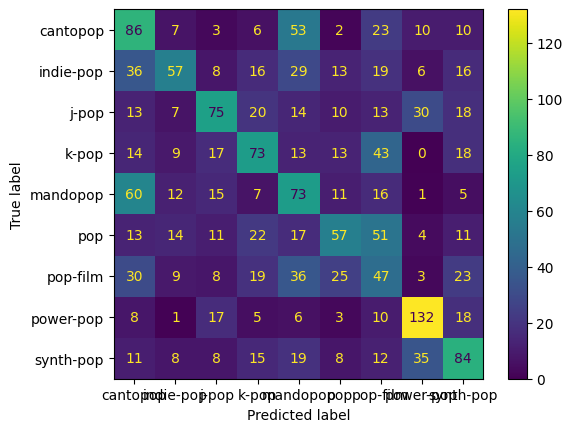

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Performance Metrics

In [14]:
print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
print("F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("F1 (micro):", f1_score(y_test, y_pred, average="micro"))

Precision (macro): 0.3925556903582676
Recall (macro): 0.38
F1 (macro): 0.3804293708417192
F1 (micro): 0.38


In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_per_fold = cross_val_score(rf, X, y, cv=kf, scoring="accuracy")
fold = pd.DataFrame({
    "Fold": np.arange(1, 6),
    "Accuracy": accuracy_per_fold
})

print(fold)

print("Average accuracy:", round(accuracy_per_fold.mean(), 5))

   Fold  Accuracy
0     1  0.410556
1     2  0.386667
2     3  0.374444
3     4  0.384444
4     5  0.438889
Average accuracy: 0.399


Overall, we find that the highest random forest accuracy for predicting genre is about 40% with a depth of 13. This performs better than the kNN models. The confusion matrix can also show us which genres of pop are easier to predict, and which genres of pop can get mixed up with each other. For example, cantopop and mandopop have high misclassification rates with one another so they must have similar characteristics.

This random forest classification can help us to recommend similar songs for the recommendation. For example, for a user that enjoys mandopop, the system could recommend other songs that were also classified as mando-pop because they are similar to songs the user already enjoys. In addition, the random forest can classify songs that the user already enjoys, and recommend songs of that genre.